In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

# Read the shapefile, boundaries
shp = gpd.read_file('shapefiles/SEN_adm1.shp')
shp.head(n=20)

ID_0  ISO   NAME_0  ID_1       NAME_1  TYPE_1 ENGTYPE_1 NL_NAME_1  \
0    201  SEN  Senegal     1        Dakar  Région    Region      None   
1    201  SEN  Senegal     2     Diourbel  Région    Region      None   
2    201  SEN  Senegal     3       Fatick  Région    Region      None   
3    201  SEN  Senegal     4     Kédougou  Région    Region      None   
4    201  SEN  Senegal     5     Kaffrine  Région    Region      None   
5    201  SEN  Senegal     6      Kaolack  Région    Region      None   
6    201  SEN  Senegal     7        Kolda  Région    Region      None   
7    201  SEN  Senegal     8        Louga  Région    Region      None   
8    201  SEN  Senegal     9        Matam  Région    Region      None   
9    201  SEN  Senegal    10      Sédhiou  Région    Region      None   
10   201  SEN  Senegal    11  Saint-Louis  Région    Region      None   
11   201  SEN  Senegal    12  Tambacounda  Région    Region      None   
12   201  SEN  Senegal    13        Thiès  Région    Region      None   
13   201  SEN  Senegal    14   Ziguinchor  Région    Region      None   

                  VARNAME_1                                           geometry  
0            Cap Vert|Dacar  MULTIPOLYGON (((-17.46736 14.65097, -17.46736 ...  
1                      None  MULTIPOLYGON (((-15.84044 15.01466, -15.84110 ...  
2                      None  MULTIPOLYGON (((-16.65375 13.64958, -16.65375 ...  
3          Sénégal Oriental  POLYGON ((-12.23999 13.46066, -12.23863 13.459...  
4                      None  POLYGON ((-15.29872 14.67901, -15.26830 14.661...  
5                      None  POLYGON ((-15.69443 14.44805, -15.69436 14.444...  
6                      None  POLYGON ((-14.86770 13.44562, -14.86219 13.445...  
7                      None  POLYGON ((-15.62251 15.99203, -15.59088 15.976...  
8                      None  POLYGON ((-13.48188 16.12821, -13.49898 16.123...  
9                      None  POLYGON ((-15.48729 13.39297, -15.48106 13.390...  
10  Fleuve|Vallée du Fleuve  POLYGON ((-14.94000 16.63096, -14.93579 16.630...  
11         Sénégal Oriental  MULTIPOLYGON (((-14.83562 13.76806, -14.83567 ...  
12                     None  POLYGON ((-16.62104 15.14535, -16.61953 15.144...  
13                     None  POLYGON ((-16.63059 13.16919, -16.62576 13.165...

In [103]:
shp = gpd.read_file('shapefiles/SEN_adm2.shp')
shp[shp['NAME_1']=='Saint-Louis']

ID_0  ISO   NAME_0  ID_1       NAME_1  ID_2       NAME_2       TYPE_2  \
32   201  SEN  Senegal    11  Saint-Louis    33       Dagana  Département   
33   201  SEN  Senegal    11  Saint-Louis    34        Podor  Département   
34   201  SEN  Senegal    11  Saint-Louis    35  Saint-Louis  Département   

     ENGTYPE_2 NL_NAME_2 VARNAME_2  \
32  Department      None      None   
33  Department      None      None   
34  Department      None      None   

                                             geometry  
32  POLYGON ((-15.40228 16.53751, -15.39933 16.537...  
33  POLYGON ((-14.94000 16.63096, -14.93579 16.630...  
34  POLYGON ((-16.33033 16.14111, -16.33037 16.132...

In [130]:
stlouis = shp[shp['NAME_1']=='Saint-Louis']

#just define each shape individually in case we need them later
podor = stlouis[stlouis['NAME_2']=='Podor']
dagana = stlouis[stlouis['NAME_2']=='Dagana']
delta = stlouis[stlouis['NAME_2']=='Saint-Louis']

In [106]:
import rpy2.robjects as ro

#read in ndvi data and lon/lat
ndvi = ro.r['load']("senegal_test-60F-1Corr.RData")

In [107]:
print(ndvi)

 [1] "savePath"        "sqrError"        "observed"        "forecastSeg"    
 [5] "randomValues"    "dates"           "beta0"           "beta1"          
 [9] "loadPath"        "covar"           "observedSeg"     "samples"        
[13] "ref"             "days"            "r2"              "sqrErSeg"       
[17] "clusterSamples"  "i"               "values"          "observedSamples"
[21] "project"         "df"              "deter1"          "deter2"         
[25] "error"           "meanSE"          "forecastSamples" "clusterSeg"     
[29] ".Random.seed"    "coefficient.lm"  "years"           "forecast"       



In [108]:
observed = pd.DataFrame(ro.r['observed']).T
observed.columns = ro.r['observed'].colnames

observed

id        lon        lat  cluster  2011_04_23  2011_05_09  \
0       54811.0 -14.990847  16.655208     86.0      0.2152      0.2785   
1       60764.0 -14.992930  16.651042     37.0      0.1884      0.3483   
2       84602.0 -14.947097  16.634375     86.0      0.2277      0.2493   
3       90594.0 -14.867930  16.630208     86.0      0.2154      0.2036   
4       96460.0 -15.051264  16.626042     86.0      0.2452      0.2166   
...         ...        ...        ...      ...         ...         ...   
8695  6153989.0 -16.438764  12.386458     56.0      0.2243      0.2256   
8696  6159915.0 -16.497097  12.382292     74.0      0.5766      0.4310   
8697  6168750.0 -16.697097  12.376042     70.0      0.4380      0.4610   
8698  6171723.0 -16.705430  12.373958     74.0      0.4908      0.4382   
8699  6195627.0 -16.522097  12.357292     70.0      0.4675      0.5225   

      2011_05_25  2011_06_10  2011_06_26  2011_07_12  ...  2018_06_10  \
0         0.3735      0.3583      0.4479      0.4447  ...      0.3705   
1         0.5514      0.5455      0.4365      0.5049  ...      0.3220   
2         0.2815      0.2536      0.2049      0.2662  ...      0.2657   
3         0.1938      0.1861      0.1790      0.2037  ...      0.1757   
4         0.2313      0.2125      0.1957      0.2421  ...      0.1822   
...          ...         ...         ...         ...  ...         ...   
8695      0.2227      0.1878      0.1797      0.1716  ...      0.2314   
8696      0.4852      0.5545      0.5432      0.5319  ...      0.4021   
8697      0.4297      0.4628      0.4834      0.5041  ...      0.3364   
8698      0.5037      0.4986      0.5414      0.5842  ...      0.2624   
8699      0.5121      0.4543      0.4804      0.5066  ...      0.4178   

      2018_06_26  2018_07_12  2018_07_28  2018_08_13  2018_08_29  2018_09_14  \
0         0.3418      0.3500      0.3425      0.2938      0.3102      0.2743   
1         0.3906      0.3525      0.3298      0.3317      0.1302      0.1541   
2         0.2174      0.2189      0.1057      0.2300      0.2609      0.0491   
3         0.1881      0.2007      0.2084      0.1914      0.2118      0.2118   
4         0.2085      0.1955      0.1330      0.1398      0.3250      0.5104   
...          ...         ...         ...         ...         ...         ...   
8695      0.2446      0.2578      0.2709      0.2841      0.2973      0.3105   
8696      0.4405      0.4788      0.5172      0.5556      0.5939      0.6323   
8697      0.3577      0.3791      0.4004      0.4217      0.4431      0.4644   
8698      0.2559      0.2493      0.2428      0.2362      0.2297      0.2231   
8699      0.4629      0.5080      0.5531      0.5982      0.6433      0.6883   

      2018_09_30  2018_10_16  2018_11_01  
0         0.1943      0.3433      0.4340  
1         0.0759      0.2314      0.3509  
2         0.3234      0.2967      0.3194  
3         0.2118      0.2118      0.2118  
4         0.5853      0.5529      0.5529  
...          ...         ...         ...  
8695      0.3237      0.4477      0.3912  
8696      0.6707      0.6221      0.6496  
8697      0.4858      0.4502      0.5322  
8698      0.2166      0.2101      0.5387  
8699      0.7336      0.6751      0.7153  

[8700 rows x 178 columns]

In [123]:
map = folium.Map(location=[15.5, -14.5], width=750, height=400, zoom_start=7)

In [124]:
for _,r in stlouis.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                            style_function=lambda x: {'fillColor': 'green',})
    folium.Popup(r['NAME_2']).add_to(geo_j)
    geo_j.add_to(map)

In [126]:
fig = folium.Figure(figsize=(12, 6))
fig.add_child(map)

## Cross-check site location with département shapes

Create three datasets based on each region

In [131]:
from shapely.geometry import shape, Point
from shapely.geometry.polygon import Polygon

points = [Point(x,y) for x,y in zip(observed['lon'], observed['lat'])]

delta_polygon = Polygon(delta['geometry'].iloc[0].exterior.coords)

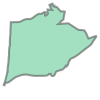

In [133]:
delta_polygon

In [135]:
delta_points = [p for p in points if delta_polygon.contains(p)]

In [139]:
delta_points

[<POINT (-16.358 15.97)>]

Ok, so you can filter for points inside the polygon with a list comp like below. 

It's a bit annoying though as it only returns the points, whereas we want the dataframe that relates to those points.

In [140]:
dagana_points = [p for p in points if Polygon(dagana['geometry'].iloc[0].exterior.coords).contains(p)]

In [142]:
len(dagana_points)

727

Try filter based on the geopandas dataframe (convert observed to geopandas df first!)

In [148]:
observed = gpd.GeoDataFrame(observed, geometry=points)
region_bool = observed.within(Polygon(dagana['geometry'].iloc[0].exterior.coords))

In [149]:
dagana_df = observed.loc[region_bool].copy()

In [153]:
len(dagana_df)

727

In [154]:
dagana_df

id        lon        lat  cluster  2011_04_23  2011_05_09  \
15   158780.0 -15.461680  16.582292     76.0      0.2955      0.2426   
18   161756.0 -15.463764  16.580208     76.0      0.3585      0.2415   
19   161758.0 -15.459597  16.580208     76.0      0.3276      0.2511   
20   164730.0 -15.470014  16.578125     76.0      0.3425      0.2427   
21   167711.0 -15.461680  16.576042     76.0      0.3568      0.2470   
..        ...        ...        ...      ...         ...         ...   
819  831134.0 -16.395014  16.111458     56.0      0.2099      0.1971   
822  849199.0 -15.972097  16.098958     76.0      0.2423      0.2361   
823  855165.0 -15.947097  16.094792     76.0      0.2882      0.3116   
824  861112.0 -15.961680  16.090625     76.0      0.2570      0.2471   
826  864085.0 -15.970014  16.088542     76.0      0.3565      0.2728   

     2011_05_25  2011_06_10  2011_06_26  2011_07_12  ...  2018_06_26  \
15       0.2412      0.2045      0.2068      0.2821  ...      0.5079   
18       0.2512      0.2459      0.1973      0.2108  ...      0.4182   
19       0.2579      0.2636      0.2158      0.2339  ...      0.4836   
20       0.2435      0.2497      0.2101      0.2377  ...      0.4350   
21       0.2552      0.2661      0.2150      0.2245  ...      0.4309   
..          ...         ...         ...         ...  ...         ...   
819      0.1992      0.2159      0.2098      0.1922  ...      0.1910   
822      0.2395      0.2378      0.2381      0.3712  ...      0.2656   
823      0.2863      0.3026      0.2461      0.4328  ...      0.2564   
824      0.2527      0.2520      0.2662      0.3585  ...      0.2949   
826      0.3046      0.2956      0.2341      0.3889  ...      0.2780   

     2018_07_12  2018_07_28  2018_08_13  2018_08_29  2018_09_14  2018_09_30  \
15       0.3905      0.4165      0.4446      0.5024      0.4940      0.4856   
18       0.4165      0.3877      0.4192      0.4973      0.4558      0.3970   
19       0.4194      0.4038      0.4585      0.5133      0.4798      0.4465   
20       0.4760      0.4194      0.5595      0.5157      0.6084      0.4673   
21       0.4058      0.4447      0.5322      0.5488      0.4799      0.5479   
..          ...         ...         ...         ...         ...         ...   
819      0.1812      0.1689      0.1088      0.2728      0.4426      0.4561   
822      0.2048      0.3384      0.3277      0.4221      0.4229      0.4238   
823      0.2945      0.3326      0.3558      0.3791      0.4025      0.3416   
824      0.3277      0.3607      0.3614      0.4263      0.4617      0.4971   
826      0.3125      0.3470      0.3987      0.4506      0.4529      0.4554   

     2018_10_16  2018_11_01                    geometry  
15       0.4089      0.2804  POINT (-15.46168 16.58229)  
18       0.3416      0.2721  POINT (-15.46376 16.58021)  
19       0.3819      0.3025  POINT (-15.45960 16.58021)  
20       0.3996      0.2698  POINT (-15.47001 16.57813)  
21       0.4524      0.4424  POINT (-15.46168 16.57604)  
..          ...         ...                         ...  
819      0.4482      0.4482  POINT (-16.39501 16.11146)  
822      0.3711      0.3010  POINT (-15.97210 16.09896)  
823      0.3466      0.3542  POINT (-15.94710 16.09479)  
824      0.3334      0.2681  POINT (-15.96168 16.09063)  
826      0.3413      0.3290  POINT (-15.97001 16.08854)  

[727 rows x 179 columns]

Ok, run that for all 3 regions and plot the resulting markers on a map:

In [155]:
region_dfs = []
for i in [dagana, podor, delta]:
    region_bool = observed.within(Polygon(i['geometry'].iloc[0].exterior.coords))
    region_dfs.append(observed.loc[region_bool].copy())

In [163]:
from folium.plugins import MarkerCluster

In [170]:
marker_cluster = MarkerCluster().add_to(map)
for i in region_dfs:
    for _,r in i.iterrows():
        folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(color='green'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(marker_cluster)

In [171]:
map

## MCC Control and treatment zones

From the MCC report we see that the treatment area and control area is not based on the departement boundary but on the longitudinal line at -15.83 degrees. 

So, I will split the data along this longitude and save the dataset into treatment and control. 

*Note that there are some regions that could also be excluded due to their location, like the most easterly podor sites, and the most southerly Dagana sites (they are on the other side of Lac de Guiers.)*

In [172]:
# so take the dagana dataframe and split it in two.

dagana_west = dagana_df[dagana_df['lon'] < -15.83]
dagana_east = dagana_df[dagana_df['lon'] > -15.83]

In [173]:
for _.r in dagana_west.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(color='green'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(marker_cluster)

In [206]:
map2 = folium.Map(location=[16.3, -16], width=750, height=400, zoom_start=9)

In [207]:
for _,r in dagana_west.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(color='red'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map2)

for _, r in dagana_east.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(color='green'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map2)

In [208]:
fig = folium.Figure(figsize=(12, 6))
fig.add_child(map2)

In [237]:
treatment_zone = pd.concat([dagana_west, region_dfs[2]])

In [238]:
control_zone = pd.concat([dagana_east, region_dfs[1]])

In [239]:
map3 = folium.Map(location=[16.3, -16], width=750, height=400, zoom_start=9)

for _,r in treatment_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='red'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map3)

for _, r in control_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='green'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map3)

fig = folium.Figure(figsize=(12, 6))
fig.add_child(map3)

Looks good, but I think the overlap is too similar (they are extremely close to each other.)

Perhaps the best thing to do is leave a 1km gao between the two zones to avoid any contamination, since we do not know the actual longitude of the separation line.

In [240]:
dagana_west = dagana_df[dagana_df['lon'] < -15.84]
dagana_east = dagana_df[dagana_df['lon'] > -15.82]

In [243]:
treatment_zone = pd.concat([dagana_west, region_dfs[2]])
control_zone = pd.concat([dagana_east, region_dfs[1]])

In [244]:
map3 = folium.Map(location=[16.3, -16], width=750, height=400, zoom_start=9)

for _,r in treatment_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='red'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map3)

for _, r in control_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='green'), popup=f"Latitude: {r['lat']}<br>Longitude: {r['lon']}<br><br>ID: {r['id']}").add_to(map3)

fig = folium.Figure(figsize=(12, 6))
fig.add_child(map3)

In [250]:
control_zone.shape

(430, 179)

#### Save these NDVI times series into two separate files for later consumption

In [253]:
pd.DataFrame.to_pickle(control_zone, 'control_zone_observed.pkl')
pd.DataFrame.to_pickle(treatment_zone, 'treatment_zone_observed.pkl')

--- 
---

So I want to double check that these locations in the far-east of the river basin are not skewing the results. 

I could plot the map again and give the markers colours based on the mean NDVI value for that location. 

*Note: careful, as I accidentally included geometry points at the end of this dataframe (TODO: change this)*

In [333]:
treatment_means = treatment_zone.iloc[:,4:-1].T.mean() #-1 excludes the geometry column
control_means = control_zone.iloc[:,4:-1].T.mean()

Text(0, 0.5, 'Lat (deg)')

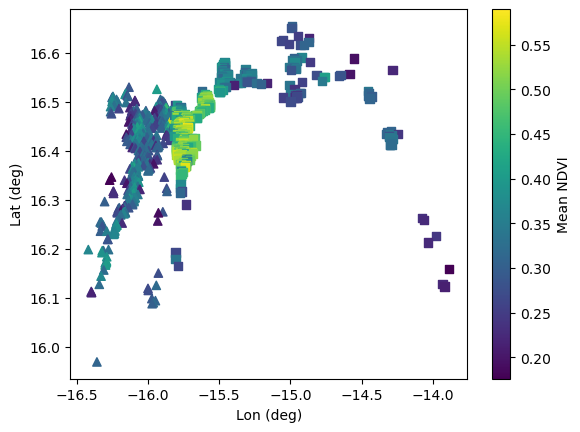

In [334]:
plt.scatter(treatment_zone['lon'], treatment_zone['lat'], c=treatment_means, cmap='viridis', marker='^')
plt.scatter(control_zone['lon'], control_zone['lat'], c=control_means, cmap='viridis', marker='s')
plt.colorbar(label='Mean NDVI')
plt.xlabel('Lon (deg)')
plt.ylabel('Lat (deg)')

In [292]:
map3 = folium.Map(location=[16.3, -16], width=750, height=600, zoom_start=9)

for i,r in treatment_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='red'), popup=f"Lat: {r['lat']:.2f}<br>Lon: {r['lon']:.2f}<br>ID: {r['id']:.1f}<br>Mean NDVI: {treatment_means[i]:.2f}").add_to(map3)

for i, r in control_zone.iterrows():
    folium.Marker(location=(r['lat'], r['lon']), icon=folium.Icon(icon='wheat-awn', prefix='fa', color='green'), popup=f"Latitude: {r['lat']:.2f}<br>Longitude: {r['lon']:.2f}<br><br>ID: {r['id']:.1f}<br>Mean NDVI: {control_means[i]:.2f}").add_to(map3)

fig = folium.Figure(figsize=(12, 8))
fig.add_child(map3)

In [335]:
control_means.max()

0.5898586206896553

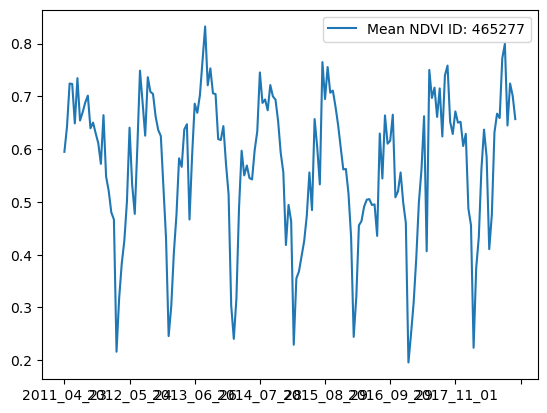

In [352]:
control_zone[control_zone['id'] == 465277.0].iloc[:,4:-1].T.plot(label='Mean NDVI ID: 465277.0')
plt.legend(['Mean NDVI ID: 465277'])

In [374]:
from folium.plugins import HeatMap

map4 = folium.Map(location=[16.3, -16], width=750, height=600, zoom_start=9)

heats_control = pd.concat([control_zone['lat'],control_zone['lon'],control_means], axis=1).values
heats_treatment = pd.concat([treatment_zone['lat'],treatment_zone['lon'],treatment_means], axis=1).values
HeatMap(heats_control, min_opacity=0.4, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}, control=True, name='Control').add_to(map4)
HeatMap(heats_treatment, min_opacity=0.4, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}, control=True, name='Treatment').add_to(map4)

folium.map.LayerControl().add_to(map4)

fig = folium.Figure(figsize=(12.6, 8))
fig.add_child(map4)

In [360]:
pd.concat([control_zone['lat'],control_zone['lon'],control_means], axis=1).values

array([[ 16.58229167, -15.46168046,   0.36130862],
       [ 16.58020834, -15.46376379,   0.38107931],
       [ 16.58020834, -15.45959712,   0.37871207],
       ...,
       [ 16.159375  , -13.88668046,   0.17600345],
       [ 16.128125  , -13.93251379,   0.22312471],
       [ 16.12395834, -13.91793046,   0.2127954 ]])